In [409]:
from IPython.display import display, Markdown

with open('CANDIDATE_INSTRUCTIONS.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# Motor Insurance Frequency Model V0.1
---

Insurance companies often model the frequency of claims, and severity of claims seperately. Claims frequency is defined as the expected number of claims that will occur over a given period of time, in this case one policy year i.e claim count per year.

You have been asked to build a new Frequency model for QBE's motor portfolio. The model will form one component of the pricing model. QBE's current frequency model has received some negative feedback from the underwriting teams, they are concerned that the model does not take account of geographic area correctly, and is not getting the most out of our data. The underwriting team would like you to develop an improved model using machine learning and data science techniques.

The underwriter for the motor portfolio has also suggested that external
[ONS Data](https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/2011censuspopulationestimatesbyfiveyearagebandsandhouseholdestimatesforlocalauthoritiesintheunitedkingdom/r12ukrttablep04ukv2_tcm77-304141.xls)
may give some insight into regional variations.

### Guidance

* You can use any valid machine learning / data science technique or algorithm for this task.

### Task
---

DEVELOP A PREDICTIVE MODEL OF CLAIM FREQUENCY


### Task Scoring
---

* __Rationale and documentation__: Documented logical and scientific rationale. Demonstrate your knowledge and choice of approach, be willing to make compromises but document your rationale.

* __Data Science workflow__: Solid implementation of Data Science model build and evaluation process. You do not need to pursue every avenue of investigation or approach, remember the reviewer is primarily interested in evaluating your thought process and ability. Do enough to demonstrate your knowledge and ability, and add comments to tell the reviewer what further investigations or improvements could be made.

* __Code Quality__: The assignment should be completed in Python, code should be clean and maintainable. Please follow a popular code style convention such as PEP8.  Use of notebooks is encouraged.

* __Visualisations__: Include visualisations within your code, remember to follow good practice assume that visuals could be included in stakeholder presentations or be used to explain a piece of analysis.

* __Business / Commercial Considerations__: Please also consider and comment on any usage,  or business related considerations, or limitations relating to your analysis.

* __Holdout__: Your model will be compared against 2019 data (please ensure your submission includes predictions for 2019).

---

### Data Files

* *Xy_candidate.csv* - Training data including the target variable.
* *X_holdout_candidate.csv* - 2019 holdout data, exludes target variable.

### Data Dictionary

* __Colour__ : Color of vehicle.
* __Driver Age__: Age of Driver.
* __Experience__ : Number of years licence has been held.
* __Gender__ : Gender of driver.
* __Type__ : Type of vehicle.
* __Mileage__ : Annual vehicle mileage estimate.
* __Vehicle Age__: Age of vehicle in years.
* __Windscreen Cover__ : Is cover for windscreen chips and cracks included.
* __Credit Score__ : Third party credit score for assured.
* __NCB__: No Claims bonus - the number of years without a claim.
* __Deductible__: The selected deductible for the policy.
* __Driving Record__ : The number of penalty points held by the policy holder.
* __Policy Duration__: The majority of risks are a 12 month duration, but some are 18 month policies.
* __Area__: Geographic region of the UK
* __Underwriting Year__: What year the policy incepted.


# Plan:
## 1. Perfrom exploratory data analysis, find insights and draw conclusions

## 2. Feature engineering

## 3. Apply Decision Tree Classifier with and without hyperparameter tuning

## 4. Apply Random Forest

>  "Predicting the claim amount value may be seen as a regression \
>  problem because the outcome is a continuous variable. At the same time the problem \
>  could be transformed into a classification one by transforming the claim amount variable \
>  into a binary variable taking value one (Y = 1) if its value is greater than zero and zero \
>  otherwise (Y = 0)." \
Source: https://dalpozz.github.io/static/pdf/Claim_prediction.pdf  



In this project, we will use Classification algorithms to predict claim frequency. Regression algorithms were tried but they were underperforming

In [16]:
import pandas as pd
data = pd.read_csv(r'C:\Users\krist\Downloads\DS Technical Challenge\Xy_candidate.csv')

In [411]:
data.head()

,Unnamed: 0,policy_ref,colour,driver_age,experience,gender,type,mileage,vehicle_age,windscreen_cover,credit_score,ncb,deductible,driving_record,policy_duration,area,underwriting_year,claim_count,policy_holder
0,0,0,blue,32.0,18.0,male,SUV,19092.0,8.0,False,348.0,2,250,1.0,18 month,Hackney,2017.0,0,Richard Brown
1,1,1,silver,55.0,17.0,female,Hatchback,1424.0,16.0,False,672.0,2,250,0.0,12 month,Sheffield,2014.0,0,Megan Knight
2,2,2,black,61.0,13.0,female,Hatchback,14028.0,7.0,False,92.0,0,250,2.0,12 month,Kensington and Chelsea,2017.0,1,Jennifer Thornton
3,3,3,white,32.0,15.0,male,Coupe,6019.0,19.0,False,260.0,2,750,6.0,12 month,Stockton-on-Tees,2014.0,0,Brian Huber
4,4,4,silver,46.0,6.0,male,Estate,2393.0,9.0,False,620.0,1,500,2.0,12 month,Renfrewshire,2018.0,0,Jacob Thompson


In [17]:
#See how many missing values we have and drop them
#Drop the unneded data
data = data.drop(['Unnamed: 0','policy_ref','policy_holder'],axis = 1) 

print(data.isnull().sum())
data = data.dropna()
print(len(data))

colour               36310
driver_age            3695
experience               0
gender                1875
type                     0
mileage                  0
vehicle_age              0
windscreen_cover         0
credit_score             0
ncb                      0
deductible               0
driving_record           0
policy_duration          0
area                     0
underwriting_year        0
claim_count              0
dtype: int64
142621


# Driver age vs Claim count

C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Claim Count')

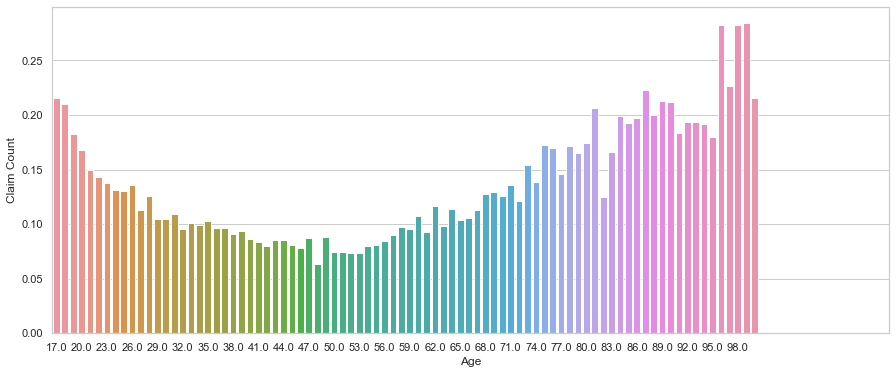

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Set figure size to be 15x6 and cahnge styles
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(data['driver_age'],data['claim_count'],ci =None)
#Make ticks more spread out and readable
ax.set_xticks(np.arange(0, max(data['driver_age']), 3))

plt.xlabel('Age')
plt.ylabel('Claim Count')

## Insight: 
### The claims are high when the driver is young, then decrease between 20 years old and 70 and they increase again.
### Premium is pushed up for younger and older people

_________________

# Claim count frequency

C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Claim count'), Text(0, 0.5, 'Frequency')]

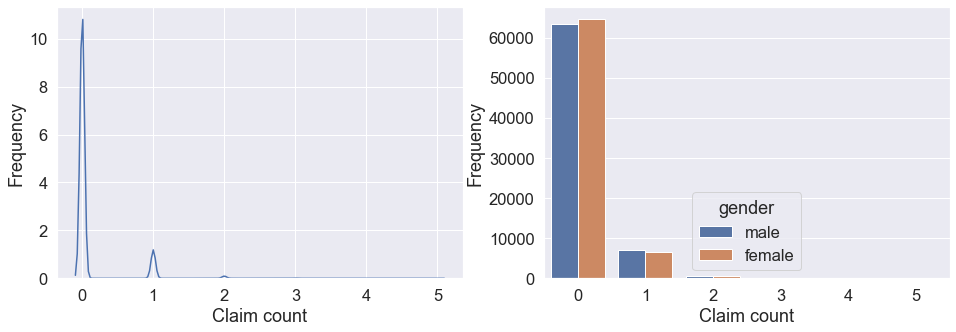

In [419]:

sns.set_theme(style='whitegrid')
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))


sns.distplot(data['claim_count'],kde = True,hist = False,ax=axes[0])
axes[0].set(xlabel='Claim count', ylabel ='Frequency')

sns.set(font_scale = 1.5)
sns.countplot(x='claim_count',hue ='gender' ,data=data,ax = axes[1])
axes[1].set(xlabel='Claim count', ylabel ='Frequency')


## Insight:
### We see a Poisson distribution
### There are almost equal amount of males and females who dont file a claim. 
### There are more males than females that file for at leat 1 claim and few file for 2.

_________________

# Pointplot

Text(0, 0.5, 'Claim count')

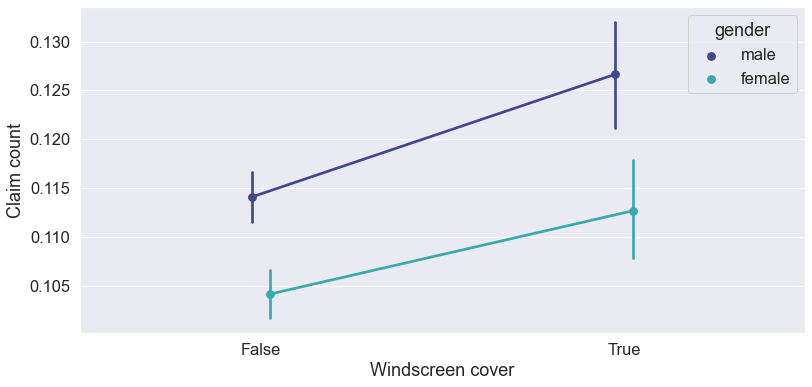

In [56]:
#Create a pointplot to check if windscreen cover affects claim count and divide by gender
sns.set_theme(style="darkgrid")
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)

#doge parameter removes the overlap
ax = sns.pointplot(x="windscreen_cover", y="claim_count",hue='gender' ,data=data,dodge=True,palette='mako')
plt.xlabel('Windscreen cover')
plt.ylabel('Claim count')

## Insight:
### Males who have a windscreen cover are most likely to file a claim, same is true for females, altough less likely

Text(0, 0.5, 'Claim count')

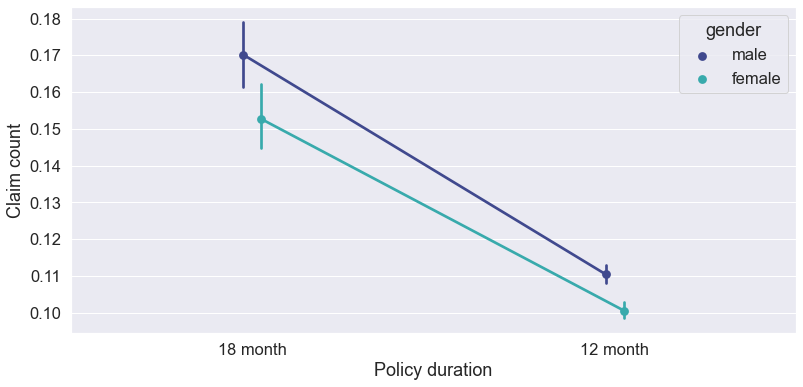

In [57]:
#Check if policy duration has an effect and divide by gender
sns.set_theme(style="darkgrid")
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)

#Use dodge to prevent overlap
sns.pointplot(x="policy_duration", y="claim_count",hue='gender' ,data=data,dodge=True,palette='mako')
plt.xlabel('Policy duration')
plt.ylabel('Claim count')

## Insight:
### Males and females who have 18 month policy duration are more likely to file a calim than those with 12 months

_________________

# NCB vs Claim count

[Text(0.5, 0, 'NCB'), Text(0, 0.5, 'Claim count')]

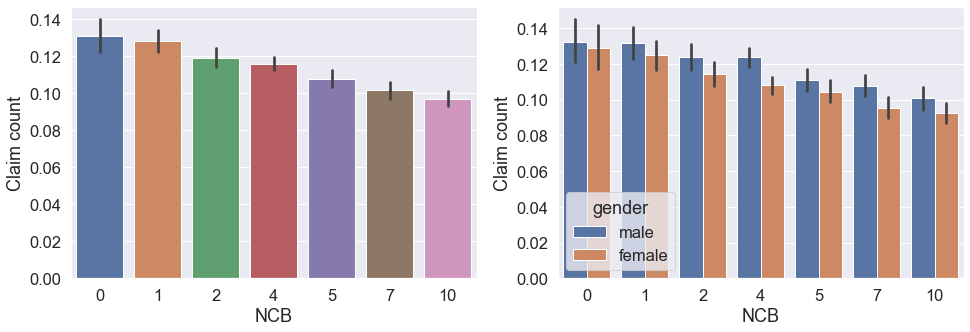

In [420]:
sns.set_theme(style='whitegrid')
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(ax=axes[0],x = 'ncb',y = 'claim_count',data = data)
axes[0].set(xlabel='NCB', ylabel ='Claim count')

sns.barplot(ax = axes[1],x = 'ncb',y = 'claim_count',data = data,hue='gender')
axes[1].set(xlabel='NCB', ylabel = 'Claim count')

## Insight:
### The higher no claim bonus, the less claim counts we have. When dividing into gender, males have higher counts

_________________

# Experience vs claim count

C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Claim count')

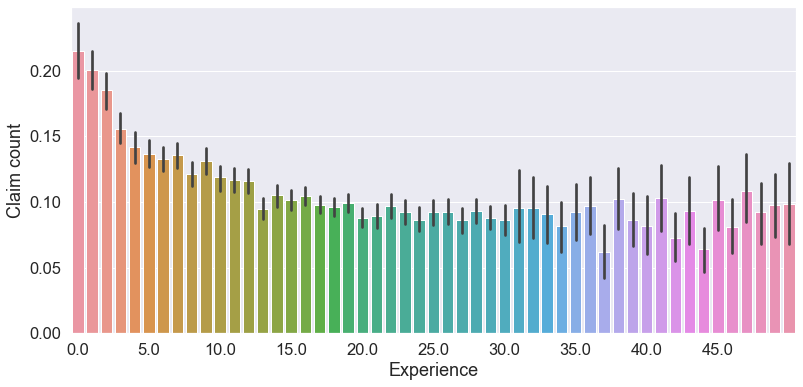

In [60]:
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)

ax = sns.barplot( data["experience"], data["claim_count"])

#Make sure no overlap between x data, set them 5 numbers apart starting from min exp until max exp
ax.set_xticks(np.arange(min(data['experience']), max(data['experience']), 5))

plt.xlabel('Experience')
plt.ylabel('Claim count')

## Insight:
### The number of claims decreases as the driver becomes more expereinced

_________________

# Driving record vs claim count

[Text(0.5, 0, 'Driving record'), Text(0, 0.5, 'Claim count')]

<Figure size 936x432 with 0 Axes>

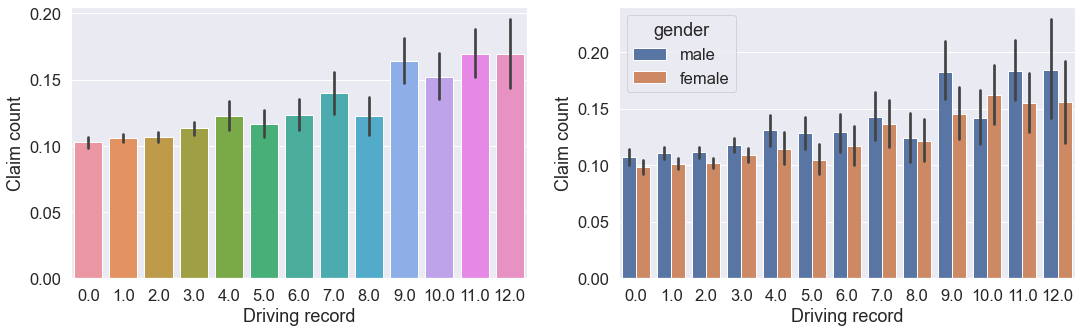

In [422]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))


sns.barplot( x ='driving_record', y = 'claim_count',data = data,ax = axes[0]) 
axes[0].set(xlabel='Driving record', ylabel ='Claim count')

sns.barplot( x ='driving_record', y = 'claim_count',hue = 'gender',data = data,ax = axes[1]) 
axes[1].set(xlabel='Driving record', ylabel ='Claim count')

## Insight:
### Claim count increases as the number of penalty points increases. In addition, males are more likely to file a claim

_________________

# Underwriting year vs Claim count

Text(0, 0.5, 'Claim count')

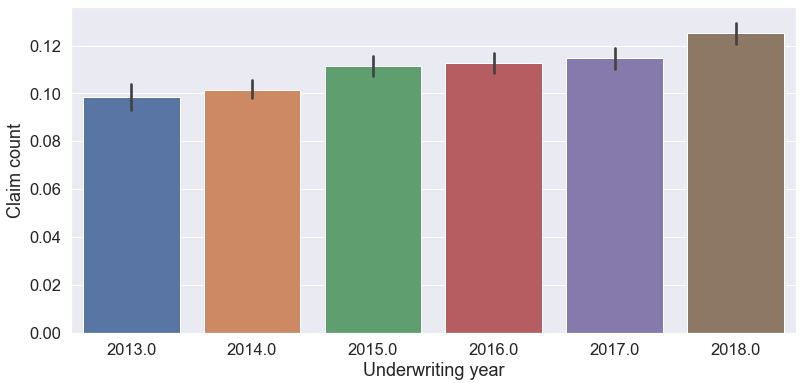

In [423]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)
sns.barplot( x ='underwriting_year', y = 'claim_count',data = data) 

plt.xlabel('Underwriting year')
plt.ylabel('Claim count')


## Insight:
### In recent years, more and more claims are being filed. 

_________________

# Deductible vs Claim Count

Text(0, 0.5, 'Claim count')

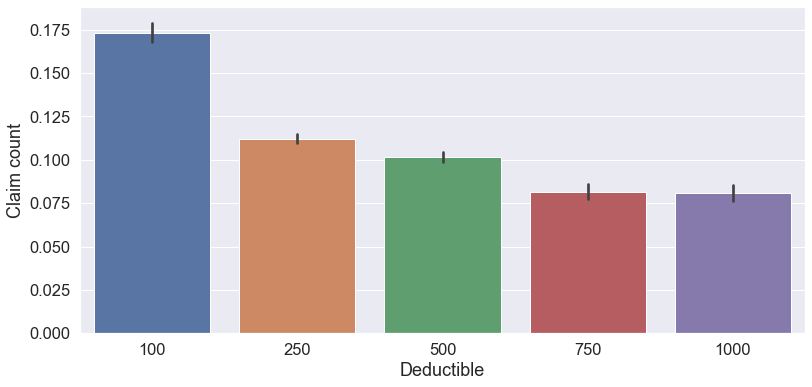

In [121]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)
sns.barplot( x ='deductible', y = 'claim_count',data = data) 

plt.xlabel('Deductible')
plt.ylabel('Claim count')
#More males have higher penalty points and hence higher claim frequency tahn females

## Insight:
### The lower the deductible, the more likely the client will file a claim

_________________

# Mileage vs Claim Count

Text(0, 0.5, 'Claim count')

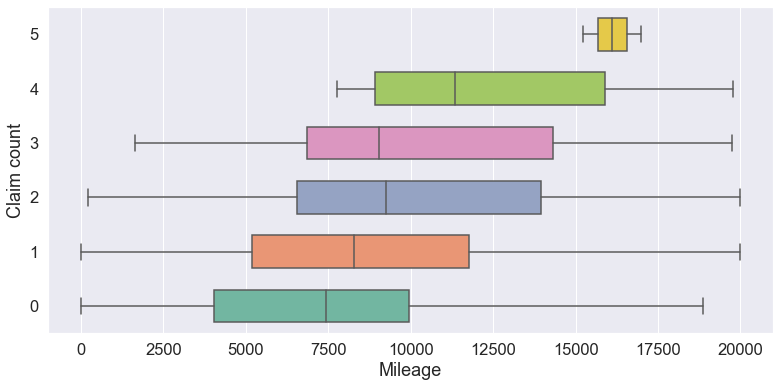

In [112]:
sns.set_theme(style="whitegrid" )
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)

sns.boxplot(x="mileage", y="claim_count", data=data,
             width=.6,palette="Set2",orient="h",showfliers = False)

plt.gca().invert_yaxis()
plt.xlabel('Mileage')
plt.ylabel('Claim count')


## Insight:
### We can approximate that the owner of a car with higher mileage will most likely file a claim

_________________

# Colour vs Claim Count

Text(0, 0.5, 'Claim count')

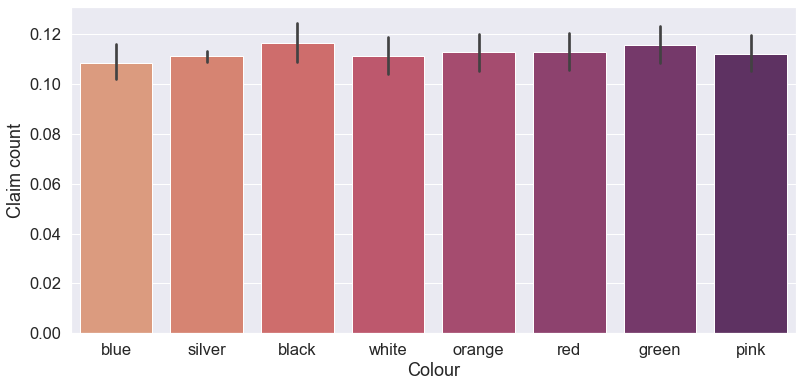

In [425]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)
sns.barplot( x ='colour', y = 'claim_count',data = data,palette='flare') 

plt.xlabel('Colour')
plt.ylabel('Claim count')

## Insight:
### The owners of black and green cars are most likely to file a claim

_________________

# Type vs Claim count

Text(0, 0.5, 'Claim count')

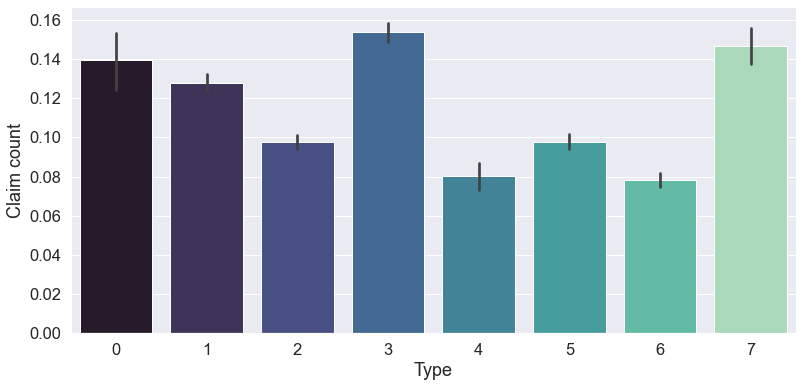

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.set(font_scale = 1.5)
sns.barplot( x ='type', y = 'claim_count',data = data,palette='mako') 

plt.xlabel('Type')
plt.ylabel('Claim count')

## Insight:
### Owners of Hatchback, Sports car and Convertable will most likely file a calim

__________________________________

# Part 2: Feature Engineering

In [19]:
#Encode the data, only objects

data["gender"] = data["gender"].astype('category')
data["gender"] = data["gender"].cat.codes


data["policy_duration"] = data["policy_duration"].astype('category')
data["policy_duration"] = data["policy_duration"].cat.codes


data["area"] = data["area"].astype('category')
data["area"] = data["area"].cat.codes


data["type"] = data["type"].astype('category')
data["type"] = data["type"].cat.codes

data["colour"] = data["colour"].astype('category')
data["colour"] = data["colour"].cat.codes

print(data.dtypes)

colour                  int8
driver_age           float64
experience           float64
gender                  int8
type                    int8
mileage              float64
vehicle_age          float64
windscreen_cover        bool
credit_score         float64
ncb                    int64
deductible             int64
driving_record       float64
policy_duration         int8
area                   int16
underwriting_year    float64
claim_count            int64
dtype: object


In [496]:
data.head()

,colour,driver_age,experience,gender,type,mileage,vehicle_age,windscreen_cover,credit_score,ncb,deductible,driving_record,policy_duration,area,underwriting_year,claim_count
0,1,32.0,18.0,1,5,19092.0,8.0,False,348.0,2,250,1.0,1,154,2017.0,0
1,6,55.0,17.0,0,3,1424.0,16.0,False,672.0,2,250,0.0,0,298,2014.0,0
2,0,61.0,13.0,0,3,14028.0,7.0,False,92.0,0,250,2.0,0,184,2017.0,1
3,7,32.0,15.0,1,1,6019.0,19.0,False,260.0,2,750,6.0,0,333,2014.0,0
4,6,46.0,6.0,1,2,2393.0,9.0,False,620.0,1,500,2.0,0,274,2018.0,0


In [20]:
#Take the X and y data and split them into train and test with test being 20%
#ExtraTreesClassifier has a method called feature importance
#The importance of a feature is computed as the (normalized) 
# total reduction of the criterion brought by that feature. It is also known as the Gini importance.

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# Pick all the X data and y 
X = data.iloc[:, 0:15]
y = data.iloc[:, 15:16]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [570]:
#Apply feature selection using ExtraTreesClassifier to find features importance
reg = ExtraTreesClassifier()
reg.fit(X_train,y_train)
#Run the code if you wish to see plot on next line, took 74.4 seconds on my machine

<ipython-input-570-8cef57fecf22>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


ExtraTreesClassifier()

<AxesSubplot:>

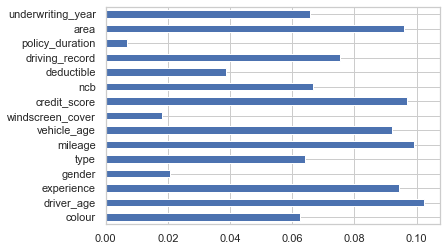

In [571]:
important_features = pd.Series(reg.feature_importances_, index = X_train.columns)
important_features.plot(kind= 'barh') #Plot a horizontal bar

### So we will drop windscreen cover, gender, deductible and policy_duration. In addition, tree based algorithms are insensitive to the scale of the features

In [21]:
#Create the new data
new_data = data.drop(['gender','deductible','windscreen_cover','policy_duration'],axis= 1)
new_data.head()

,colour,driver_age,experience,type,mileage,vehicle_age,credit_score,ncb,driving_record,area,underwriting_year,claim_count
0,1,32.0,18.0,5,19092.0,8.0,348.0,2,1.0,154,2017.0,0
1,6,55.0,17.0,3,1424.0,16.0,672.0,2,0.0,298,2014.0,0
2,0,61.0,13.0,3,14028.0,7.0,92.0,0,2.0,184,2017.0,1
3,7,32.0,15.0,1,6019.0,19.0,260.0,2,6.0,333,2014.0,0
4,6,46.0,6.0,2,2393.0,9.0,620.0,1,2.0,274,2018.0,0


__________________________________

# Part 3: Decision Tree without hyperparameter tuning

Decision tree and Random forest were chosen becasue this paper outlines they were the best performing algorithms:\
Machine Learning Approaches for Auto Insurance Big Data
Mohamed Hanafy and Ruixing Ming

## Decision Tree Classifier

Pros:
1. It can work in a non-linear fashion, it can achieve high performance
2. Easy to interpret and understand

Cons:
1. They can easily overfit
2. Random Forests need a lot of memory and are slower \
(hence why I have not applied GridSearchCV in Random Forest case)

In [22]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [62]:
#Split the data into train and test
X = new_data.iloc[:, 0:11]
y = new_data.iloc[:, 11:12]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [63]:
decisiontree = DecisionTreeClassifier()
decisiontree = decisiontree.fit(X_train,y_train)
#Predict the test dataset
y_pred = decisiontree.predict(X_test)

In [65]:
print("Accuracy for decision tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy for decision tree: 0.79908851884312


# Decision Tree with hyperparamter tuning

In [14]:
# Hyperparameter tuning

parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_weight_fraction_leaf': [0.1,0.2,0.6,0.8,0.9],
    'criterion': ["gini", "entropy"]
}


In [15]:
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid=parameters, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [16]:
grid_search.fit(X_train,y_train) 

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\krist\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.89774401 0.89774401        nan        nan        nan 0.89774401
 0.89774401        nan        nan        nan 0.89774401 0.89774401
        nan        nan        nan 0.89774401 0.89774401        nan
        nan        nan 0.89774401 0.89774401        nan        nan
        nan 0.89774401 0.89774401        nan        nan        nan
 0.89774401 0.89774401        nan        nan        nan 0.89774401
 0.89774401        nan        nan        nan 0.89774401 0.89774401
        nan        nan        nan 0.89774401 0.89774401        nan
        nan        nan 0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.6, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [17]:
grid_search.best_estimator_
#Results:
#DecisionTreeClassifier(max_depth=2, min_samples_leaf=5,
                       #min_weight_fraction_leaf=0.1)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5,
                       min_weight_fraction_leaf=0.1)

In [66]:
decisiontree_hyper = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5,
                       min_weight_fraction_leaf=0.1)
decisiontree_hyper.fit(X_train, y_train)
y_pred = decisiontree_hyper.predict(X_test)

In [67]:
print("Accuracy of decision tree (hyperparamters):",metrics.accuracy_score(y_test, y_pred)) #10% increase

Accuracy of decision tree (hyperparamters): 0.8931814198071867


***

# Part 4: Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

X = new_data.iloc[:, 0:11]
y = new_data.iloc[:, 11:12]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

randomforest = RandomForestClassifier(n_estimators=100)
#Train the model
randomforest.fit(X_train,y_train)

y_pred = randomforest.predict(X_test)

<ipython-input-68-1c8f9454dbe5>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train,y_train)


In [69]:
print("Accuracy for random forest:",metrics.accuracy_score(y_test, y_pred))
#The result is almost the same as a decision tree with hyperparameters tuned

Accuracy for random forest: 0.8931463628396143


***

# Apply Random Forest to predict the data

Random Forest was chosen as it it simpler and has overall good accuracy

In [50]:
#Load the candidate data and perform the same operations as before

final_data = pd.read_csv(r'C:\Users\krist\Downloads\DS Technical Challenge\X_holdout_candidate.csv')

In [51]:
final_data = final_data.drop(['Unnamed: 0','policy_ref','policy_holder'],axis = 1) 

print(final_data.isnull().sum())
final_data = final_data.dropna()
print(len(final_data))

colour               3290
driver_age            331
experience              0
gender                171
type                    0
mileage                 0
vehicle_age             0
windscreen_cover        0
credit_score            0
ncb                     0
deductible              0
driving_record          0
policy_duration         0
area                    0
underwriting_year       0
dtype: int64
12925


In [52]:
final_data = final_data.drop(['gender','deductible','windscreen_cover','policy_duration'],axis= 1)

In [53]:
#Encode the data, only objects



final_data["area"] = final_data["area"].astype('category')
final_data["area"] = final_data["area"].cat.codes


final_data["type"] = final_data["type"].astype('category')
final_data["type"] = final_data["type"].cat.codes

final_data["colour"] = final_data["colour"].astype('category')
final_data["colour"] = final_data["colour"].cat.codes

print(final_data.dtypes)

colour                  int8
driver_age           float64
experience           float64
type                    int8
mileage              float64
vehicle_age          float64
credit_score         float64
ncb                    int64
driving_record       float64
area                   int16
underwriting_year    float64
dtype: object


In [54]:
final_data 

,colour,driver_age,experience,type,mileage,vehicle_age,credit_score,ncb,driving_record,area,underwriting_year
0,6,31.0,18.0,1,12597.0,8.0,163.0,7,0.0,1,2019.0
2,6,34.0,19.0,2,7550.0,4.0,684.0,10,0.0,55,2019.0
3,2,21.0,18.0,4,21.0,9.0,616.0,0,4.0,0,2019.0
4,6,33.0,18.0,3,4266.0,6.0,693.0,10,2.0,53,2019.0
6,5,19.0,10.0,1,19009.0,8.0,709.0,10,1.0,188,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
16614,6,43.0,16.0,1,15303.0,5.0,700.0,5,1.0,193,2019.0
16616,5,60.0,4.0,5,16036.0,4.0,647.0,4,0.0,309,2019.0
16617,3,37.0,1.0,5,14671.0,23.0,624.0,4,3.0,108,2019.0
16619,6,34.0,19.0,1,2881.0,9.0,709.0,4,1.0,393,2019.0


In [70]:
from sklearn.ensemble import RandomForestClassifier

y_final_pred = randomforest.predict(final_data) #RandomForestClassifier from the previous part
y_final_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
occurrences_1 = np.count_nonzero(y_final_pred == 1)
occurrences_0 = np.count_nonzero(y_final_pred == 0)

print('The number of 1: ',occurrences_1) #we would have 1 claim 3 times 
print('The number of 0: ',occurrences_0)

The number of 1:  3
The number of 0:  12922
